<a href="https://colab.research.google.com/github/wakii/ds_parrot/blob/master/wine_classification_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Classification with Random Forest, XGBoost, LightGBM

## 2기 최우혁

## Environment Setting

In [84]:
!pip install sklearn

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Fetching, Preprocessing

In [0]:
# import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';' )
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';' )

In [0]:
red['type'] = 0
white['type'] = 1

In [88]:
raw_data = pd.concat([red,white])
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [0]:
raw_data[['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','sulphates']] = raw_data[['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','sulphates']].apply(np.log)

In [90]:
train_pre = raw_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates']]
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   sulphates             6497 non-null   float64
dtypes: float64(9)
memory usage: 507.6 KB


## Classification

### Decision Tree

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, plot_importance
from sklearn.metrics import accuracy_score

#Regression 문제의 경우, RandomForestRegressor, XGBRegressor, LGBMRregressor로 import 가능
x_train, x_test, y_train, y_test = train_test_split(train_pre, raw_data[['type']], test_size=0.2, random_state=13)

In [92]:
tree = DecisionTreeClassifier(max_depth=3, random_state=123457)
tree.fit(x_train, y_train)

train_score = tree.score(x_train, y_train)
test_score = tree.score(x_test, y_test)

predict_y = tree.predict(x_test) # x_train을 넣은 결과가 y_train / x_test를 넣은 결과가 y_test
print('Score1: {}'.format(tree.score(x_train, y_train)))
print('Score2: {}'.format(tree.score(x_test, y_test)))

Score1: 0.9751779873003656
Score2: 0.9707692307692307


In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_y)

array([[299,  16],
       [ 22, 963]])

In [0]:
#               red  |  white
# red    예측    299     16
# white  예측    22      963

### Random Forest

In [0]:
from sklearn.model_selection import GridSearchCV

In [96]:
rf = RandomForestClassifier(random_state = 123457)
rf.fit(x_train, y_train)

rf_predict = rf.predict(x_test)
print('Random Forest Score: {}'.format(accuracy_score(y_test, rf_predict)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Score: 0.9938461538461538


In [64]:
rf1 = RandomForestClassifier(n_estimators=10, max_depth=5,random_state = 123457)
rf1.fit(x_train, y_train)

rf1_predict = rf1.predict(x_test)
print('Random Forest Score: {}'.format(accuracy_score(y_test, rf1_predict)))

Random Forest Score: 0.9907692307692307


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [66]:
rf2 = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, random_state = 123457)
rf2.fit(x_train, y_train)

rf2_predict = rf2.predict(x_test)
print('Random Forest Score: {}'.format(accuracy_score(y_test, rf2_predict)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Score: 0.9923076923076923


In [77]:
param_grid={'n_estimators': range(100,300,100),'max_depth':range(1,10), 'min_samples_split':[2,5,10,30]}


gs = GridSearchCV(rf, param_grid=param_grid , return_train_score=True)
gs.fit(y_test, rf_predict)
# results = gs.cv_results_

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [0]:
??RandomForestClassifier

In [33]:
results

{'mean_fit_time': array([0.12128758, 0.12197957, 0.12213717, 0.11759195, 0.12157702,
        0.11909699, 0.11981091, 0.11945796, 0.12102165]),
 'mean_score_time': array([0.00785613, 0.00787716, 0.00786643, 0.00777445, 0.00893888,
        0.00857329, 0.00793495, 0.00792551, 0.00803871]),
 'mean_test_score': array([0.99384615, 0.99384615, 0.99384615, 0.99384615, 0.99384615,
        0.99384615, 0.99384615, 0.99384615, 0.99384615]),
 'mean_train_score': array([0.99384615, 0.99384615, 0.99384615, 0.99384615, 0.99384615,
        0.99384615, 0.99384615, 0.99384615, 0.99384615]),
 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9}],
 'rank_

In [75]:
print("best score is {}".format(gs.best_score_))
print("best hyper parameter is {}".format(gs.best_params_))

best score is 0.9938461538461538
best hyper parameter is {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 100}


- best hyper parameter값은 기본값과 동일하게 나온다.

In [0]:
??GridSearchCV

### XGBoost

In [97]:
xgb = XGBClassifier(random_state = 123457)
xgb.fit(x_train, y_train)

xgb_predict = xgb.predict(x_test)
print('XGboost Score: {}'.format(accuracy_score(y_test, xgb_predict)))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGboost Score: 0.9953846153846154


In [46]:
xgb2 = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=300)
xgb2.fit(x_train, y_train)

xgb2_predict = xgb2.predict(x_test)
print('XGboost Score: {}'.format(accuracy_score(y_test, xgb2_predict)))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGboost Score: 0.9961538461538462


In [47]:
xgb3 = XGBClassifier(max_depth=3, learning_rate=0.05, n_estimators=300)
xgb3.fit(x_train, y_train)

xgb3_predict = xgb3.predict(x_test)
print('XGboost Score: {}'.format(accuracy_score(y_test, xgb3_predict)))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGboost Score: 0.9953846153846154


In [135]:
param_grid={'n_estimator':range(100,1000,100),'max_depth':range(1,10), "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7,1.0 ] ,"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]}


gs = GridSearchCV(xgb, param_grid=param_grid, return_train_score=True)
gs.fit(y_test, xgb_predict)
# results = gs.cv_results_

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=123457, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7, 1.0],
                         'learning_rate': [0.05, 0.1, 0.15, 

In [136]:
# results
print("best score is {}".format(gs.best_score_))
print("best hyper parameter is {}".format(gs.best_params_))

best score is 0.9953846153846154
best hyper parameter is {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 1, 'n_estimator': 100}


- randomforest보다 accuracy가 0.02%p 증가했다.
- xgbclassifier의 default hyperparameter와 동일하게 best parameter가 뽑혔다.
  이는 xgb2에서 99.6%가 나왔음에도 이렇게 뽑힌 것을 보면, GridSearch를 잘 못 돌린 것 같다.

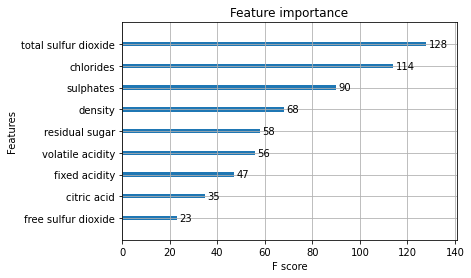

In [116]:
from xgboost import plot_importance
plot_importance(xgb)

- decision tree에서와 같이 `total surful dioxide`, `chlorides`,`sulphates` 등이 가장 중요한 feature로 뽑힌다.

### LightGBM

In [118]:
lgbm = LGBMClassifier(random_state = 123457)
lgbm.fit(x_train, y_train)

lgbm_predict = lgbm.predict(x_test)
print('LightGBM Score: {}'.format(accuracy_score(y_test, lgbm_predict)))

LightGBM Score: 0.9969230769230769


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
??LGBMClassifier

In [121]:
lgbm1 = LGBMClassifier(max_depth = 3, num_leaves=[31], random_state = 123457)
lgbm1.fit(x_train, y_train)

lgbm1_predict = lgbm1.predict(x_test)
print('LightGBM Score: {}'.format(accuracy_score(y_test, lgbm1_predict)))

LightGBM Score: 0.9938461538461538


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
lgbm2 = LGBMClassifier(max_depth = 3, num_leaves=63, learning_rate=0.01, random_state = 123457)
lgbm2.fit(x_train, y_train)

lgbm2_predict = lgbm2.predict(x_test)
print('LightGBM Score: {}'.format(accuracy_score(y_test, lgbm2_predict)))

LightGBM Score: 0.9792307692307692


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [131]:
param_grid={'max_depth':range(1,5,10), "num_leaves":[31,63,127],"learning_rate": [0.01,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]}


gs = GridSearchCV(lgbm, param_grid=param_grid, return_train_score=True)
gs.fit(y_test, lgbm_predict)
# results = gs.cv_results_

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=123457, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25,
            

In [132]:
# results
print("best score is {}".format(gs.best_score_))
print("best hyper parameter is {}".format(gs.best_params_))

best score is 0.9969230769230769
best hyper parameter is {'learning_rate': 0.01, 'max_depth': 1, 'num_leaves': 31}


- hyperparameter setting을 기본으로 했을 때가 가장 최적의 결과를 보여준다.
- xgboost보다 learning_rate의 값이 낮아야 좋은 결과를 갖는다.
- xgboost보다 accuracy가 더 올라갔다. 99.5%에서 0.1%p 상승했는데 꽤나 유의미한 발전이다

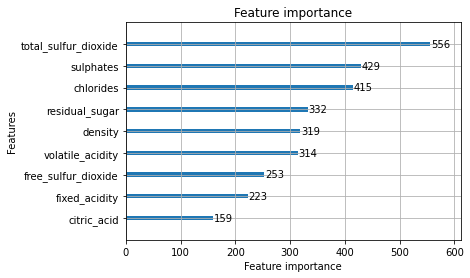

In [117]:
from lightgbm import plot_importance
plot_importance(lgbm)

- lgbm에서 역시 같은 Feature들이 동일한 순서로 중요하게 뽑혔다. 다만 feature importance의 단위가 더 크다.